In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
path = Path('..') / 'data' / 'EXTRACT_LIGNES_VENTES.csv'
fields = {'orgacom':'category',
          'month':'category',
          'week':'category',
          'date':'object',
          'pricetype':'category',
          'client':'object',
          'doctype':'category',
          'origin':'category',
          'salesgroup':'category',
          'material':'object',
          'brutrevenue':'float',
          'brutrevcur':'category', 
          'netrevenue':'float', 
          'netrevcur':'category',
          'weight':'float',
          'weightunit':'category',
          'marginperkg':'float'}

orgacom
month
week
date
pricetype
client
doctype
origin
salesgroup
material
brutrevenue
brutrevcur
netrevenue
netrevcur
weight
weightunit
marginperkg


In [24]:
data = pd.read_csv(path,
                   sep=';',
                   header=None,
                   names=list(fields.keys()),      
                   dtype=fields, 
                   parse_dates=['date'], )
data.tail(5)

,orgacom,month,week,date,pricetype,client,doctype,origin,salesgroup,material,brutrevenue,brutrevcur,netrevenue,netrevcur,weight,weightunit,marginperkg
1799118,1ALO,201906,201926,2019-06-28,ZTP,0000256480,ZC10,VR,M32,000000000000016816,81.00,EUR,81.00,EUR,4.80,KG,6.75
1799119,1ALO,201906,201926,2019-06-28,ZTP,0000257007,ZC10,TV,F57,000000000000186620,23.00,EUR,23.00,EUR,10.00,KG,0.70
1799120,1ALO,201906,201926,2019-06-28,ZTP,0000258278,ZC10,VR,597,000000000000006588,37.40,EUR,37.40,EUR,5.54,KG,1.16
1799121,1ALO,201906,201926,2019-06-28,ZTP,0000258278,ZC10,VR,597,000000000000062052,17.91,EUR,17.91,EUR,3.01,KG,1.17
1799122,1ALO,201906,201926,2019-06-28,ZTPE,0000098539,ZC10,VR,563,000000000000202168,28.31,EUR,27.74,EUR,1.98,KG,2.65


In [32]:
data.drop(['month', 'week', 'brutrevcur', 'weightunit', 'netrevenue', 'netrevcur'], axis=1, inplace=True)

In [39]:
data['margin'] = data.marginperkg * data.weight
data['purchcost'] = data.brutrevenue - data.margin
data['purchcostperkg'] = data.purchcost / data.weight
data.sample(5)

,orgacom,date,pricetype,client,doctype,origin,salesgroup,material,brutrevenue,weight,marginperkg,margin,purchcost,purchcostperkg
1416159,1ALO,2019-02-05,ZTCR,0000126143,ZC10,VR,928,000000000000002477,9.00,12.384,0.27,3.34368,5.65632,0.456744
1384163,1ALO,2019-01-22,ZTCR,0000194343,ZC10,VR,642,000000000000062841,32.60,6.270,1.13,7.08510,25.51490,4.069362
814556,1ALO,2018-06-06,ZTCR,0000025102,ZC10,VR,565,000000000000131212,23.20,20.000,0.37,7.40000,15.80000,0.790000
131035,1ALO,2017-08-28,ZTG,0000190806,ZC10,TV,600,000000000000007993,73.75,25.000,1.16,29.00000,44.75000,1.790000
1409011,1ALO,2019-01-31,ZTM,0000175423,ZC10,VR,H23,000000000000008231,99.80,20.000,1.32,26.40000,73.40000,3.670000


In [79]:
matfields = {'code article':'object',
              'libellé article':'category',
              'code gamme':'category',
              'libellé gamme':'category', 
              'MARC-MMSTA':'category',
              'MARC-LVORM':'category',
              'MVKE-LVORM':'category',
              'MVKE-MVSTA':'category',
              'MARA-LVORM':'category',
              'Hiérarchie produit':'object',
              'Type d\'article':'category',
              'Division':'object', 
              'Org. commerciale':'category', 
              'Canal distribution':'category',
              'File d\'achat':'category', 
              'Marque industrielle':'category', 
              'Marque commerciale':'category', 
              'Grpe de marchandises':'category', 
              'Poids net':'float', 
              'Unité de p':'category',
              'V1':'category',
              'V2':'category',
              'V3':'category',
              'LG1':'category',
              'LG2':'category',         
             }

df_mat = pd.read_csv(Path('..') / 'data' / 'Référentiel_ConverteO_1ALO_Art_20191209.csv', 
                     sep=';', 
                     header=0, 
                     encoding="ISO-8859-1", 
                     dtype=matfields,
                     decimal=",")
df_mat.sample(10)

,code article,libellé article,code gamme,libellé gamme,MARC-MMSTA,MARC-LVORM,MVKE-LVORM,MVKE-MVSTA,MARA-LVORM,Hiérarchie produit,...,Marque industrielle,Marque commerciale,Grpe de marchandises,Poids net,Unité de p,V1,V2,V3,LG1,LG2
10482,94864,"Kit pasta fruits mer (220Gx10)/2,2KG",9,Gamme Prestation,NaN,NaN,NaN,NaN,NaN,203520100505,...,E03,999,ZSURGE,2.20,KG,A,A,A,FR,FR
212,1621,NPU Tarte pom Normande D27CM (750Gx6) Da,14,Gamme Fin de vie,ZD,X,X,Z0,X,200520050505,...,104,999,ZSURGE,0.75,KG,A,A,A,FR,FR
16586,197807,Pennette integra cte Bio 1KGx5/5KG Zini,4,Gamme Tronc Assortim,NaN,NaN,NaN,NaN,NaN,203515100505,...,233,270,ZSURGE,1.00,KG,A,A,A,FR,FR
16716,201805,"Bf faux filet BBC (140Gx10) 1,4KG",9,Gamme Prestation,NaN,NaN,NaN,NaN,NaN,401050050505,...,1,999,ZFRAIS,1.00,KG,A,A,A,FR,FR
9129,87153,Dinde saute brai Afnor ct s/v 2KG envx3,9,Gamme Prestation,NaN,NaN,NaN,NaN,NaN,401050050505,...,C73,999,ZFRAIS,1.00,KG,A,A,A,FR,FR
12626,144720,NPUFreccia fromage montdesgrisons(2KGx2),19,Gamme Fin de vie - P,ZD,X,X,Z0,X,203535050505,...,999,247,ZSURGE,4.00,KG,A,A,A,FR,FR
9318,87935,NPU Tomate farcie s/porc (120Gx48) /6KG,19,Gamme Fin de vie - P,ZD,X,X,Z0,X,203535050505,...,72,999,ZSURGE,6.00,KG,A,A,A,FR,FR
3700,33013,NPU Flt saumon keta s/p s/at900/1200 5KG,14,Gamme Fin de vie,ZD,X,X,Z0,X,501045050505,...,167,999,ZSURGE,5.00,KG,A,A,A,FR,FR
11069,96860,NPU Cake sale Bio jambon olive (300Gx4),19,Gamme Fin de vie - P,ZD,X,X,Z0,X,202540050505,...,999,999,ZSURGE,1.20,KG,A,A,A,FR,FR
3292,30116,NPU Boeuf SH IEQ (100G /6KG) Elivia,14,Gamme Fin de vie,ZD,X,X,Z0,X,401050050505,...,9,999,ZSURGE,6.00,KG,A,A,A,FR,FR


In [80]:
df_mat.loc[df_mat['code article'].str.isnumeric(), 'code article'] = df_mat.loc[df_mat['code article'].str.isnumeric(), 'code article'].str.zfill(18)

In [81]:
df_mat.set_index('code article', inplace=True, drop=True)

In [82]:
df_mat['libellé article']

code article
000000000000018714       Pave merlu blanc a/p (140/160G /3KG)
000000000000052700          Fx flt bf se/pare UE (+3KGx2) LBC
000000000000135386      Yt boire aro fruit (100Gx6x4) Gervais
000000000000000088     Paupt saumon citr 1,44KGx6 /8,64KG EPC
000000000000000103    NPU Aiguillette poulet sce normande/2KG
                                       ...                   
S_PLASTIQUE                                 PALETTE PLASTIQUE
S_ROLLS                                                 Rolls
TRANSPORT                                article de transport
TRANSPORTFR                        article de transport frais
TRANSPORTSU                      article de transport surgelé
Name: libellé article, Length: 17335, dtype: category
Categories (17144, object): ['# Aligot tome fraiche (400Gx10)/4KG', '# Apero du chef 140pce /3,024KG Bqt d or', '# Avocat cube 14x14mm IQF 1KGx5', '# Avocat demi IQF 80G (1KGx5)', ..., 'choucroute crue seau 10KG', 'fleischnackas recette trad 1KGx4', '

In [84]:
data = data.merge(df_mat['libellé article'], left_on='material', right_index=True)
data.sample(10)

,orgacom,date,pricetype,client,doctype,origin,salesgroup,material,brutrevenue,weight,marginperkg,margin,purchcost,purchcostperkg,libellé article
1465064,1ALO,2019-02-22,ZTM,0000237544,ZC10,VR,H58,000000000000178112,23.85,3.000,1.73,5.19000,18.66000,6.220000,Agnolotti cepe mozzarella 1KGx3/3KG Zini
388470,1ALO,2017-12-07,ZTM,0000142376,ZA02,MUEN,M32,000000000000172198,-99.00,-4.400,4.80,-21.12000,-77.88000,17.700000,"Saum fum sel sec pretr 0,9/1,3KGx10/11KG"
1542745,1ALO,2019-03-26,ZTP,0000129452,ZC10,VR,642,000000000000038490,34.20,1.950,5.93,11.56350,22.63650,11.608462,*NR Feuillantine choco en bande (650Gx3)
1198229,1ALO,2018-11-02,ZTM,0000224705,ZC10,VR,640,000000000000091965,37.43,7.500,0.96,7.20000,30.23000,4.030667,"Flt plt UE 200/350G 2,5KGx4 /10KG"
189628,1ALO,2017-09-20,ZTCR,0000103532,ZC10,VR,928,000000000000060187,8.15,2.832,0.93,2.63376,5.51624,1.947825,CG chocolat 5Lx2 PPF
916179,1ALO,2018-07-12,ZTP,0000025223,ZC10,VR,931,000000000000152098,27.90,2.250,3.50,7.87500,20.02500,8.900000,"#Demi cadre croq manguepassion(2,25KGx1)"
1458792,1ALO,2019-02-21,ZTCR,0000211363,ZC10,TV,602,000000000000002477,7.80,12.384,0.14,1.73376,6.06624,0.489845,Lait 1/2 ecreme UHT France (1Lx6)
1188664,1ALO,2018-10-30,ZTM,0000158835,ZC10,VR,G83,000000000000030164,24.25,3.070,1.77,5.43390,18.81610,6.129023,"Munster 27% AOP 750Gx2/1,5KG Marikel"
1494712,1ALO,2019-03-07,ZTCR,0000191459,ZC10,TV,G83,000000000000007993,11.95,5.000,0.23,1.15000,10.80000,2.160000,Creme fraiche epaisse 30% 5L PPF
651389,1ALO,2018-03-30,ZTG,0000087307,ZC10,TV,564,000000000000058532,13.34,0.780,5.17,4.03260,9.30740,11.932564,*AC Brie meaux lt cru aff 20% AOP 750G


In [108]:
data.pivot_table(values='material', index='doctype', columns='origin', aggfunc='count')

origin,#,SCHR,TELE,TV,VR,MUEN,WEB,FRN
doctype,,,,,,,,
ZA01,286.0,7.0,681.0,NaN,10.0,34.0,2.0,NaN
ZA02,994.0,1273.0,1652.0,1.0,25.0,272.0,1.0,1.0
ZA03,257.0,3.0,369.0,NaN,11.0,NaN,NaN,NaN
ZC02,1925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZC10,1503.0,NaN,NaN,918664.0,840601.0,NaN,20551.0,NaN
ZR01,7199.0,496.0,10.0,NaN,NaN,NaN,NaN,NaN
ZR02,828.0,12.0,986.0,1.0,4.0,439.0,NaN,NaN
ZC01,20.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [99]:
(data.loc[data.doctype.isin(['ZC10', 'ZC01'])]
     .groupby('origin')
     .mean())

,brutrevenue,weight,marginperkg,margin,purchcost,purchcostperkg
origin,,,,,,
#,78.255305,9.884547,3.563093,21.298568,56.956738,8.598535
SCHR,NaN,NaN,NaN,NaN,NaN,NaN
TELE,31.844000,2.813000,2.894000,7.755780,24.088220,9.050662
TV,34.949240,6.665832,2.412825,9.865180,25.084060,5.327214
VR,37.092200,6.576095,2.494174,10.422342,26.669858,5.500424
MUEN,NaN,NaN,NaN,NaN,NaN,NaN
WEB,33.170021,5.845594,3.183659,10.956234,22.213787,5.838153
FRN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='origin'>

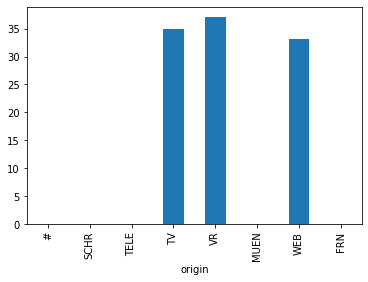

In [110]:
(data.loc[data.doctype.isin(['ZC10']) & (data.origin.isin(['TV', 'VR', 'WEB']))]
     .groupby('origin')
     .mean()
     .loc[: ,'brutrevenue']
     .plot(kind='bar')
)

In [184]:
orders = (
data.loc[data.doctype.isin(['ZC10']) & (data.weight != 0)]
    .groupby(['date', 'origin', 'client'],
             observed=True,
            )
    .agg ({'brutrevenue': 'sum',
           'weight': 'sum', 
           'margin': 'sum',
           'material': 'count',
          })
    .rename({'material': 'linecount'}, axis=1)
)
orders

brutrevenue   weight     margin  linecount
date       origin client                                                
2017-07-03 VR     0000021256       552.67  128.806  235.37224         21
                  0000022129       305.27   91.648   74.24136         10
                  0000022222       264.43   53.396  101.16373         14
                  0000024249       421.71  244.222  103.70778         28
                  0000024882       325.01   67.900  141.77068         12
...                                   ...      ...        ...        ...
2019-06-28 WEB    0000238157       979.23  181.100  431.29100          9
                  0000239100       225.00   27.000   77.22000          1
                  0000242172       245.78   53.514   80.96478         13
                  0000247142       350.64   26.782  126.46180          7
                  0000247661       157.56   13.280   67.20160          5

[195732 rows x 4 columns]

In [185]:
orders['marginperkg'] = orders.margin / orders.weight
orders

brutrevenue   weight     margin  linecount  \
date       origin client                                                   
2017-07-03 VR     0000021256       552.67  128.806  235.37224         21   
                  0000022129       305.27   91.648   74.24136         10   
                  0000022222       264.43   53.396  101.16373         14   
                  0000024249       421.71  244.222  103.70778         28   
                  0000024882       325.01   67.900  141.77068         12   
...                                   ...      ...        ...        ...   
2019-06-28 WEB    0000238157       979.23  181.100  431.29100          9   
                  0000239100       225.00   27.000   77.22000          1   
                  0000242172       245.78   53.514   80.96478         13   
                  0000247142       350.64   26.782  126.46180          7   
                  0000247661       157.56   13.280   67.20160          5   

                              marginperkg  
date       origin client                   
2017-07-03 VR     0000021256     1.827339  
                  0000022129     0.810071  
                  0000022222     1.894594  
                  0000024249     0.424646  
                  0000024882     2.087933  
...                                   ...  
2019-06-28 WEB    0000238157     2.381507  
                  0000239100     2.860000  
                  0000242172     1.512964  
                  0000247142     4.721895  
                  0000247661     5.060361  

[195732 rows x 5 columns]

<AxesSubplot:xlabel='date'>

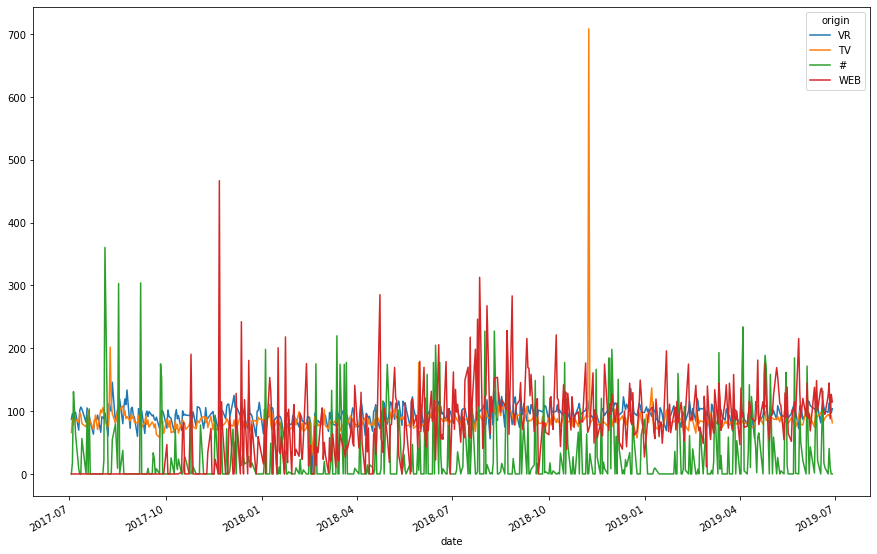

In [199]:
fig, ax = plt.subplots(figsize=(15, 10))
(
orders.groupby(['origin', 'date'], observed=True)['margin']
      .mean()
      .unstack('origin', fill_value=0)
      .rolling(1)
      .mean()
      .plot(kind='line', ax=ax)
)